
<h1><center> Project 6: Capstone Project </center></h1>

 ###  Structure of Report
<ol>
<li><a href="#intro">Business and Data Understanding</a></li>
      &nbsp; &emsp; <a href="#1"> a. Goal of project </a>
  <br>&nbsp; &emsp; <a href="#2">b. Dataset overview </a>
  <br>&nbsp; &emsp; <a href="#3">b. Key decision </a>
<li><a href="#wrangling">Store Format for Existing Stores</a></li>
<li><a href="#eda">Store Format for New Stores</a></li>
<li><a href="#conclusions">Forecasting Produce Sales for 2016</a></li>


<a id='intro'></a>
## 1. Business and Data Understanding
<a id='1'></a>
#### a. Goal of project
- Situation
    - A company currently has 85 grocery stores and 
    - Planning to open 10 new stores at the beginning of the year. 
    - Currently, all stores use the same store format for selling their products (all stores similarly, shipping the same amount of product to each store). 
    - Problems:
        - product surpluses in some product categories and
        - shortages in others. You've been asked to provide analytical 
        - 10 new stores opening up at the beginning of the year without sales data for these new stores
        - Fresh produce has a short life span, and due to increasing costs needed to have an accurate monthly sales forecast.
- Initiative
    - Different store formats (different product selection for better matching local demand)
    - Determine store format each of the new stores based on using each of the new store’s demographic data.
- My tasks are 
    - Support to make decisions about store formats and inventory planning.
    - Determining Store Format and the optimal number of store formats based on sales data.
    - Determine the Store Format for New Stores. 
    - Develop a model that predicts which segment a store falls into based on the demographic and socioeconomic characteristics of the population that resides in the area around each new store.
    - Forecasting monthly Produce Sales for the full year of 2016 for both existing and new stores.


<a id='2'></a>
#### b. Datasets overview
- `storedemographicdata.csv` - This file contains demogeographic information of each store, such as information about age groups, income, education, the number of person in a household, house values, or population density.

- `storeinformation.csv` - This file contains store information for each store.

- `storesalesdata.csv` - This file contains daily sales information of all stores from 2012 to 2015.

<a id='3'></a>
#### c. Key Decisions:
- What decisions needs to be made?
> 1. Determining Store Format,
  2. Determine the Store Format for New Stores,
  3. Forecasting monthly Produce Sales for the full year of 2016 for both existing and new stores.



<a id='wrangling'></a> 
## 1. Store Format for Existing Stores
#### - Workflow to find out Store Formats for Existing Stores
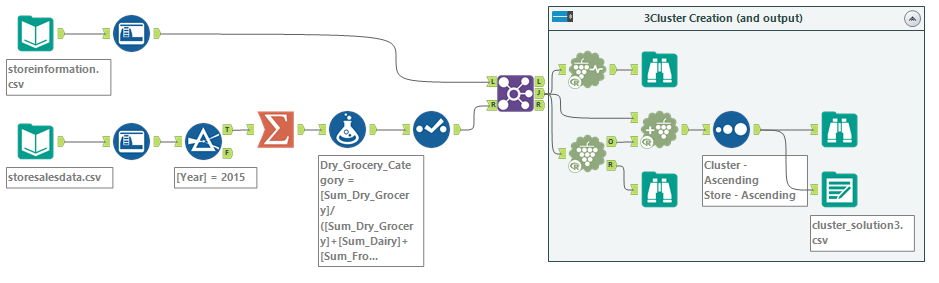

#### - The optimal Format number for existing Stores
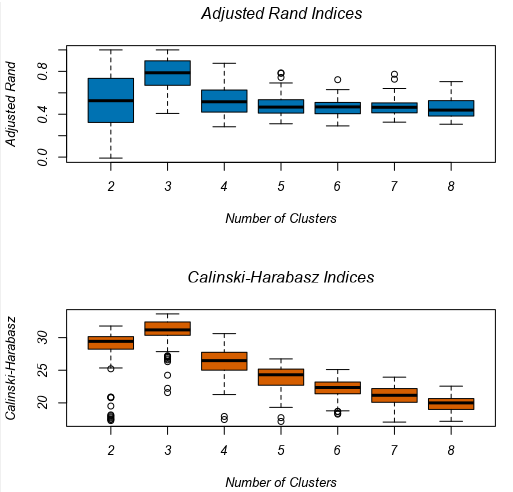

- According to 2 plots of Adjusted Rand Indices and Calanski Harabas Indices, it is clear that with 3 clusters, we will get the highest mean, the tightest bound. 

>So 85 stores should be splitted into 3 clusters.

#### - Number of existing stores in each cluster

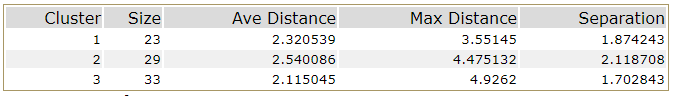

#### - Characters of each cluster
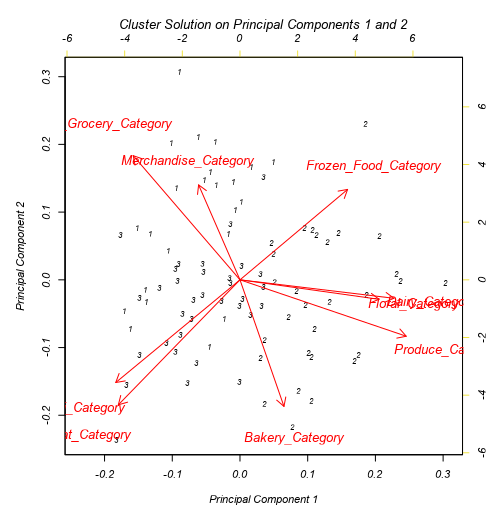

- With the cluster solution plot, it seems that cluster 2 is defined based on `Frozen_Food_Category`, `Floral_Category`, `Produce_Category`, `Dairy_Category` and `Bakery_Category` is separate very clearly with 2 other clusters. Whereas Cluster 1 is based `Dry_Grocery_Category` and `Merchandise_Category` and the last one, Cluster 3, is based on `Meat_Category` and `Deli_Category`. But some elements in Cluster 1 and Cluster 3 are mixed.

- With the Figure following we can have an overview about the characters of clusters. 
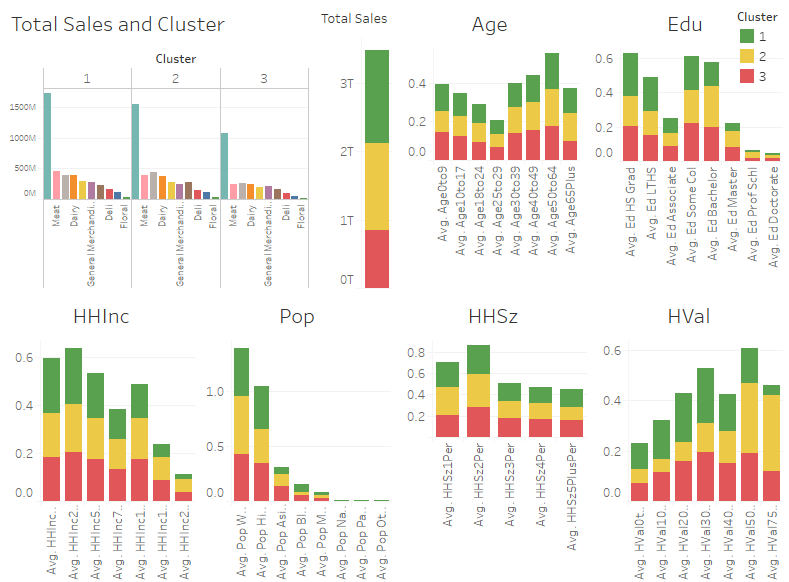
- At first we can see an overview about the behaviors of each cluster with the total sale. Clearly, clusters 1 contributes the largest part of total sale althought demographic and socioeconomic characteristics in cluster 1 seems not as good as the cluster 2 with the lower house values, lower income per household and lower population in labour ages. The education niveau of population in cluster 1 with a bachelor, master or higher is also lower. Whereas the cluster 2 seems to have the best demographic and socioeconomic characteristics which are in contrast with cluster 1. Cluster 3 and cluster 1 seems to have some similarities.
 
#### - The location of the existing stores with color to show cluster, and size to show total sales. 
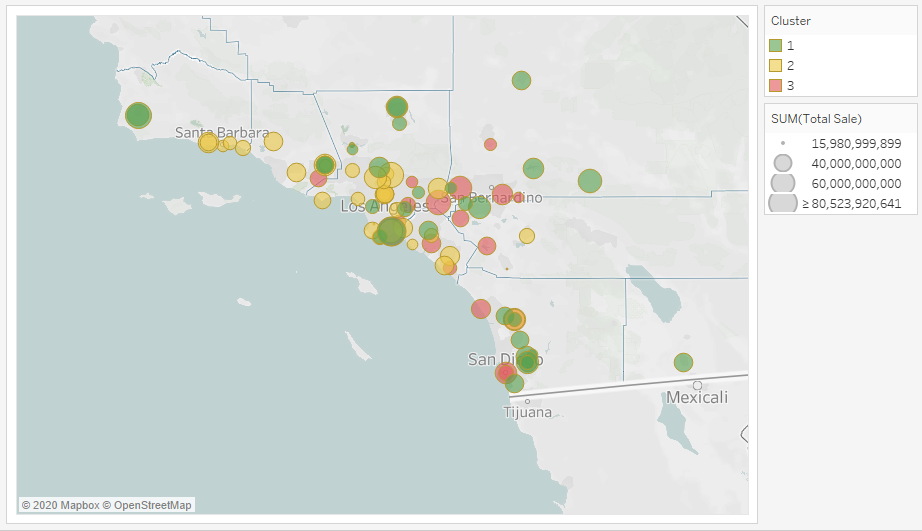
[Link in Tableau Public](https://public.tableau.com/profile/lien.phuong#!/vizhome/Mapping_15939641028620/Sheet1)

<a id='eda'></a> 
# 2. Store Format for New Stores
#### a. Workflow to find out Store Format for New Stores
In this part, we develop a model that predicts which segment or cluster a store falls into based on the demographic and socioeconomic characteristics of the population. Then using that model to determine which format suits to each store.
Under is the workflow of determining format for new stores: 

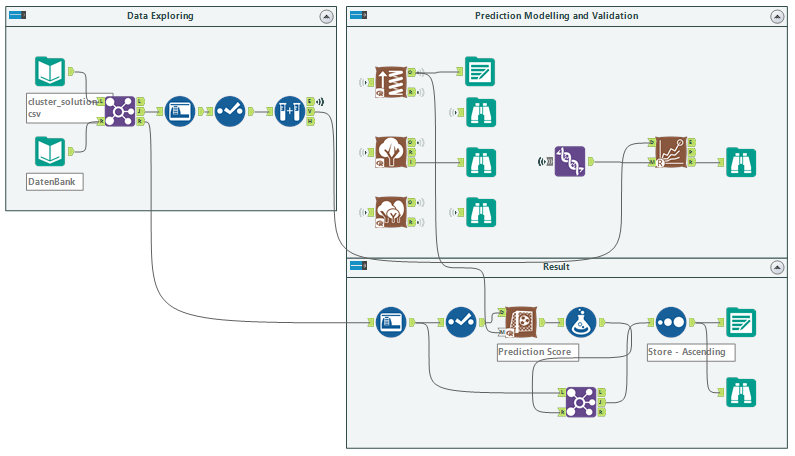
<center>The Workflow to detemine format for new stores</center>

#### b. Methodology to predict the best store format for the new stores
 - To detemine the Format for New Stores, we will use 3 Models: `Decision Tree`, `Forest Model` und `Boosted Model` because the target variable is a category variable with more than 2 values.
 - To choose the best Model, we use `Model comparison` to compare the performent of 3 Models. According to the **Model Comparison Report** it is clear that `Boosted Model` has the best performents with the highest `Accuracy` of 82.35% and the highest `F1 Score` (a precision measure) of 88.89%. Here is the Model Comparison Report:
  
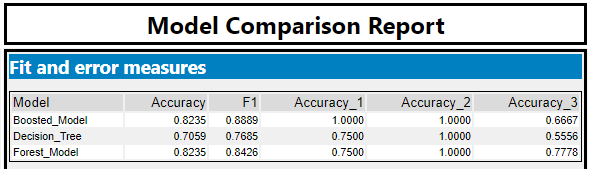

> So we will choose `Boosted Model` to predict the format for new stores

#### c. The most important variables 
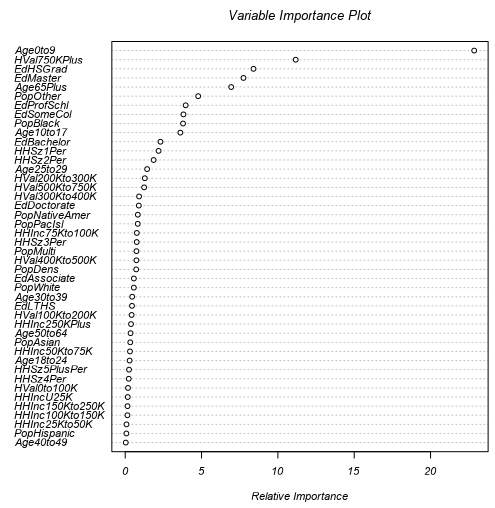
> 3 most important variables from `Boosted Model`: `Age0to9`, `HVal759KPlus`, `EdHSGrad` 

- According to the plot of Important variables from Boosted Model, it can be seen that `Age0to9`, `HVal759KPlus`, `EdHSGrad` respectively are the most 3 important variables. However, when we looks at the top ten important variables, we can see that Education, und then the age of those under oder above labor age plays a crucial role.

#### d. Format for each of the 10 new stores 
- After choosing the Boosted Model as the best model, We predict the format of the new stores based on the information of the demographic and socioeconomic characteristics of the population resides in the area around each new store. We use `Prediction Score` to find out which format suits to each new store. The result is the table following:

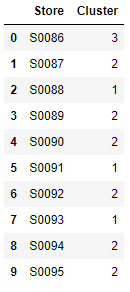

<a id='conclusions'></a> 
## 3. Forecasting Produce Sales for 2016
#### a. Workflow to find out the best predicted model
- In order to forecast the produce sales for 2016, 2 Tools under consideration are ` ETS` (an exponential smoothing method) and  `ARIMA` which are using to estimate a time series forecasting model. To choose one of 2 tools for predicting Produce Sales for 2016, we use `TS Comparison`. The Workflow to forecasting Produce Sales is following: 
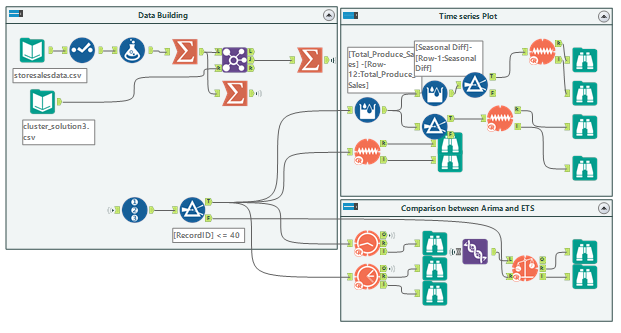
<center> The Workflow to predict Produce Sales 2016</center>

#### b. Overview about the data building
- At first we need to process the given data to build monthly produce sales data of existing stores. Then we use data of last 6 months to validate the 2 models ETS and ARIMA, the data of another months is used to develop predicted models. To better understand the time series data and to determine how to proceed in developing a forecasting model, we can use `TS Plot` to have the plots under: 
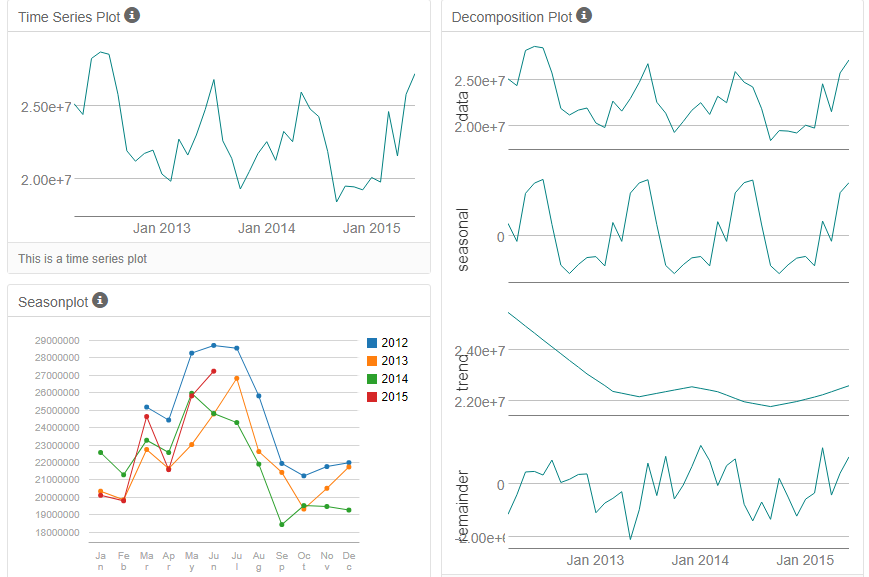

#### c. Choosing the best model
**Choosing ETS model**
Plot show multiple plots including constand fluctuations of a seasonal plot, a no clear trend plot,  unconstand fluctation of an error plot 
> `ETS (M,N,M)` will be choosen to compare with ARIMA and predict data 2016

**Choosing ARIMA model**
- Having seasonality suggests that any ARIMA models used for analysis will need seasonal differencing. Because there are seasonal components found in the time series, so `ARIMA(p, d, q)(P, D,Q)m` model are used for forecasting. The ACF presents of the original plot shows slowly a serial correlations towards 0 with increases at the seasonal lags. Since serial correlation is high, differencing needs to be perform.
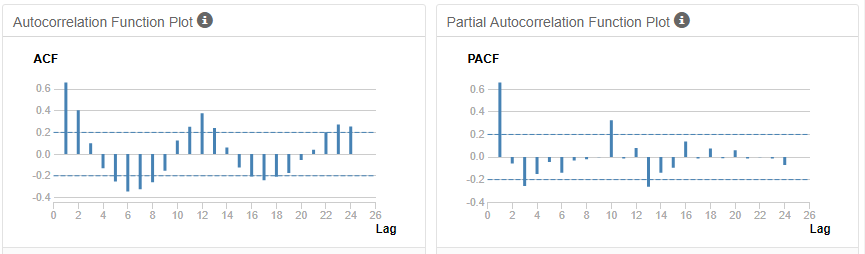
<center> ACF and PACF plot of original model</center>

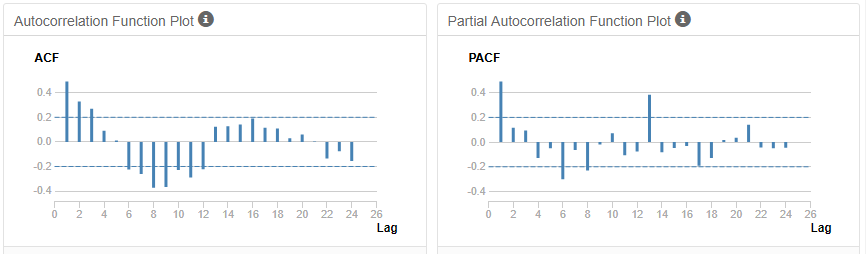
- The seasonal difference presents a slightly less autocorrelations and partial autocorrelations as those in the initial plots without big difference. In order to remove correlation we will need to difference further. 

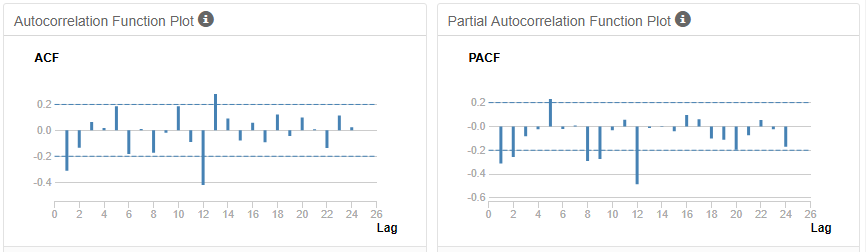
- The seasonal first difference of the series has removed most of the significant lags from the ACF and PACF so there is no need for further differencing. The remaining correlation can be accounted for using autoregressive and moving average terms and the differencing terms will be d(1) and D(1). The ACF plot shows a strong negative correlation at lag 1 which is confirmed in the PACF. This suggests an q(1) model since  there is 1 significant lag on ACF and confirmed by PACF. The seasonal lag 12 both in the ACF and PACF shows a need for Q(1). There are 12 months in a year (season).
> so we choose ARIMA(0, 1, 1)(0, 1, 1)[12]

**Choosing `ETS(M,N,M)` or `ARIMA(0,1,1)(0,1,1)` model for forecast**

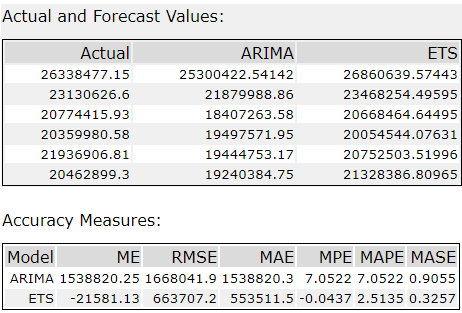

- According to table `Actual and Forecast Values`, we can see that the `ETS(M,N,M)` model has a better accurancy in comparison with the ARIMA model. In almost falls, predicted values of ETS are near with the actual values than those of ARIMA. The `Accuracy measure` table can confirm it. And with the Plot following, we can show it more clearly:
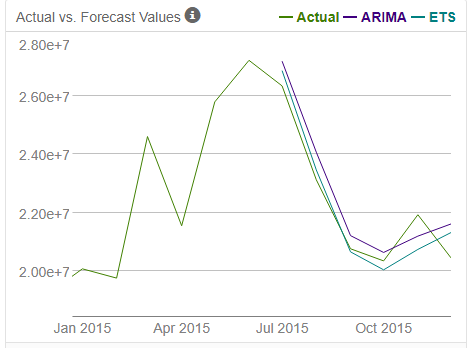
> So we will choose ETS to predict the value for the produce sale in 2016

#### c. The forecast results
Under is the workflow to get the results from `ETS` model
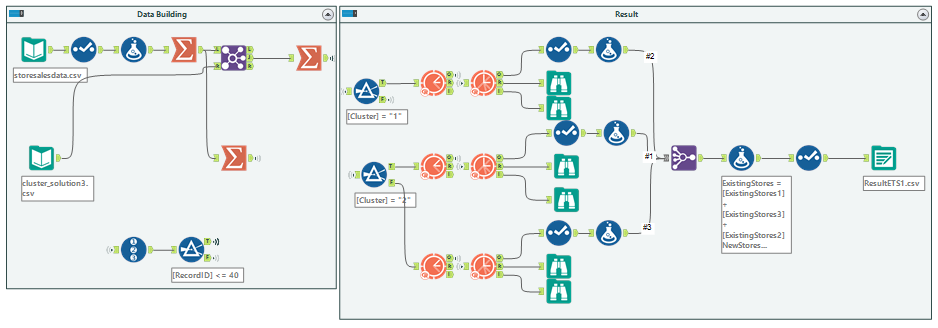

- We the workflow like above we will get the forecast result like following.

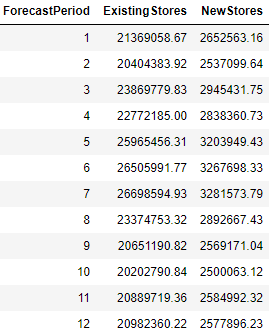

With the help of Tableau, the forecast sales of both existing stores as well as the new stores along with the historiscal data are presented following:

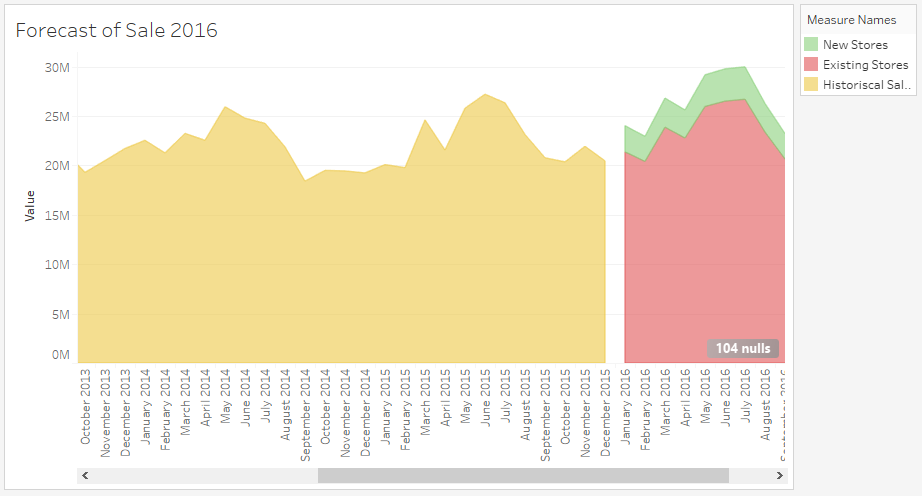
